## Social Media Engagement Forecasting

by **Brad Gauvin**, **Jess Gardin**, **Meredith Wang**, **Saroj Duwal** (alphabatical order)

Sep - Oct 2022

***

<h1 align="center">Project Goal</h1>

TikTok is a relatively new platform in the social media game. Yet it was able to take the lead and generate over **$6.1** billion revenue within 6 years. Our goal is to:

▪️ Find the key driver of engagement of trending videos in the past 2 years

▪️ Analyze the seasonlity of video's engagement

▪️ High-level comparison with other major social media platforms (YouTube, Instagram)

▪️ Using time series models to forecast engagement

▪️ Provide strategy for businesses and E-commerces so that they can utilize our insight to find the "perfect timing" or thier marketing campaings and get the most out of possible branded-effect with worldwide audience.

***

<h1 align="center">Questions Raised<h1>

▪️ What does trending video's duration distribution look like? Is most vidoes on TikTok short (<15?)

▪️ Is the avg. video duration of a category more than the other? If so, which video length drives the highest engagement for each category?

▪️ What's the avg engagement metrics of trending vidoe's in the past two years?

▪️ Where does TikTok stand compared to YouTube and Instagram?

▪️ Is a certian category's engagement significant more than the other?

▪️ Does creator's follower size correlate with engagement?

▪️ Are there certain key words/hashtags that drive engagement?

***

<h1 align="center">Data Dictionary</h1>

**Variable** |    **Value**    | **Meaning**
---|---|---
<span style="background-color: #ffe0bd">*commentCount*</span> | int | The number of comments on a video
<span style="background-color: #ffe0bd">*diggCount*</span> | int | The number of likes on a video
<span style="background-color: #ffe0bd">*playCount*</span> | int | The number of views on a video
<span style="background-color: #ffe0bd">*shareCount*</span> | int | The number of shares on a video
<span style="background-color: #ffe0bd">*followerCount*</span> | int | The number of followers a creator has
<span style="background-color: #ffe0bd">*heartCount*</span> | int | The total number of likes a creator has gotten for that account
<span style="background-color: #ffe0bd">*videoCount*</span> | int | The number of videos a creator has posted as public
<span style="background-color: #ffe0bd">*description*</span>| string object | The description of videos
<span style="background-color: #ffe0bd">*time*</span> | datetime object | The time a video is posted, formatted in epoch time
<span style="background-color: #ffe0bd">*hashtag*</span> | string object | The hashtag the caption of the video contains
<span style="background-color: #ffe0bd">*category*</span> | string obejct | The category the video belongs to

***

<h1 align="center">Wrangle Data</h1>

## 1. Data Acquisition
▪️Data acquisition contains 3 platforms: Tiktok, Youtube, Instagram; 5 categories: **Fahion & Beauty**, **Humor**, **Political Contents**, **Food**, **Fitness & Lifestyle**

▪️Tiktok data is acquired through TikAPI, using search hashtag and search top influencers approach, detailed steps please reference [acquire editing]()

▪️Youtube data is acquired through functions inside `youtube-search-python 1.6.6` (built-in Python library), detailed steps please reference [acquire editing]()

▪️Instagram data is acquired and extracted through an existing dataset. We used automated data extraction to go through 1.5 million json files and condensed useful information into a dataframe.

## 2. Data Preparation

▪️ **Automated Data Extraction**


▪️ **Missing Values (NaN):**
    
- All the null values are <span style="color: blue"> **dropped** </span>

- We feel comfortable dropping null values because there's only 1 row of missing value out of several thousand observations

▪️ **Data Conversion**
- Convert `date` to datatime object

- Convert object to `int` datatype

- Set date as index of the dataframe

▪️ **Data Encoding**
- Created new column `hour`, `minute`, `second` corresponding to `duration`, and tranform them into length in seconds.


▪️ **Text Cleaning**
- Text normalization

- Remove non-alphabetical characters

- Text parsing

***

<h1 align="center">Data Context</h1>

In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
from math import sqrt
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

# import the datetime module
import datetime

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#import functions
import prepare

#functions for Time Series modeling
from statsmodels.tsa.api import Holt

# -facebook prophet model
#from prophet import Prophet

# visuals
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

#Natural Language Processing
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# set format (optional)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# reading in messy data
tiktok = pd.read_csv('tiktok_data.csv')

In [3]:
# using cleaning functino to clean data
tiktok = prepare.prep_tiktok(tiktok)

***

<h1 align="center">Exploratory Analysis</h1>

## ▪️ What does trending video's duration distribution look like? Is most vidoes on TikTok short (<15?) --- Univariate Analysis: Duration

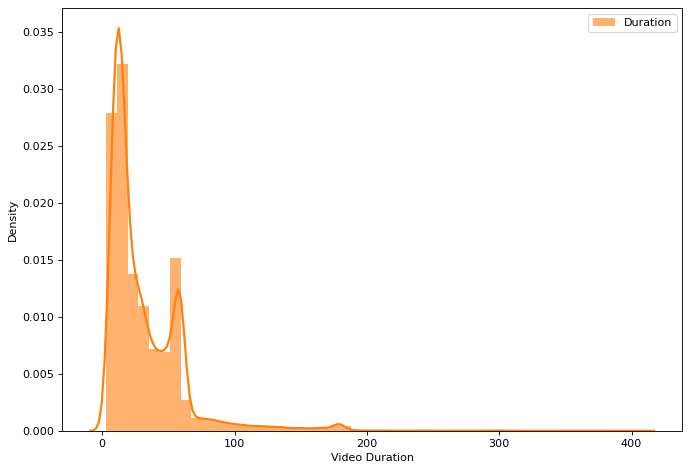

In [4]:
# duration distribution
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(tiktok.duration, color="#ff800e", label="Duration", **kwargs)
plt.xlabel('Video Duration')
plt.ylabel('Density')
plt.legend();

### TikTok Duration Recording Options
- 15s
- 30s
- 3m (180s)
- beyond 3m(>180s)

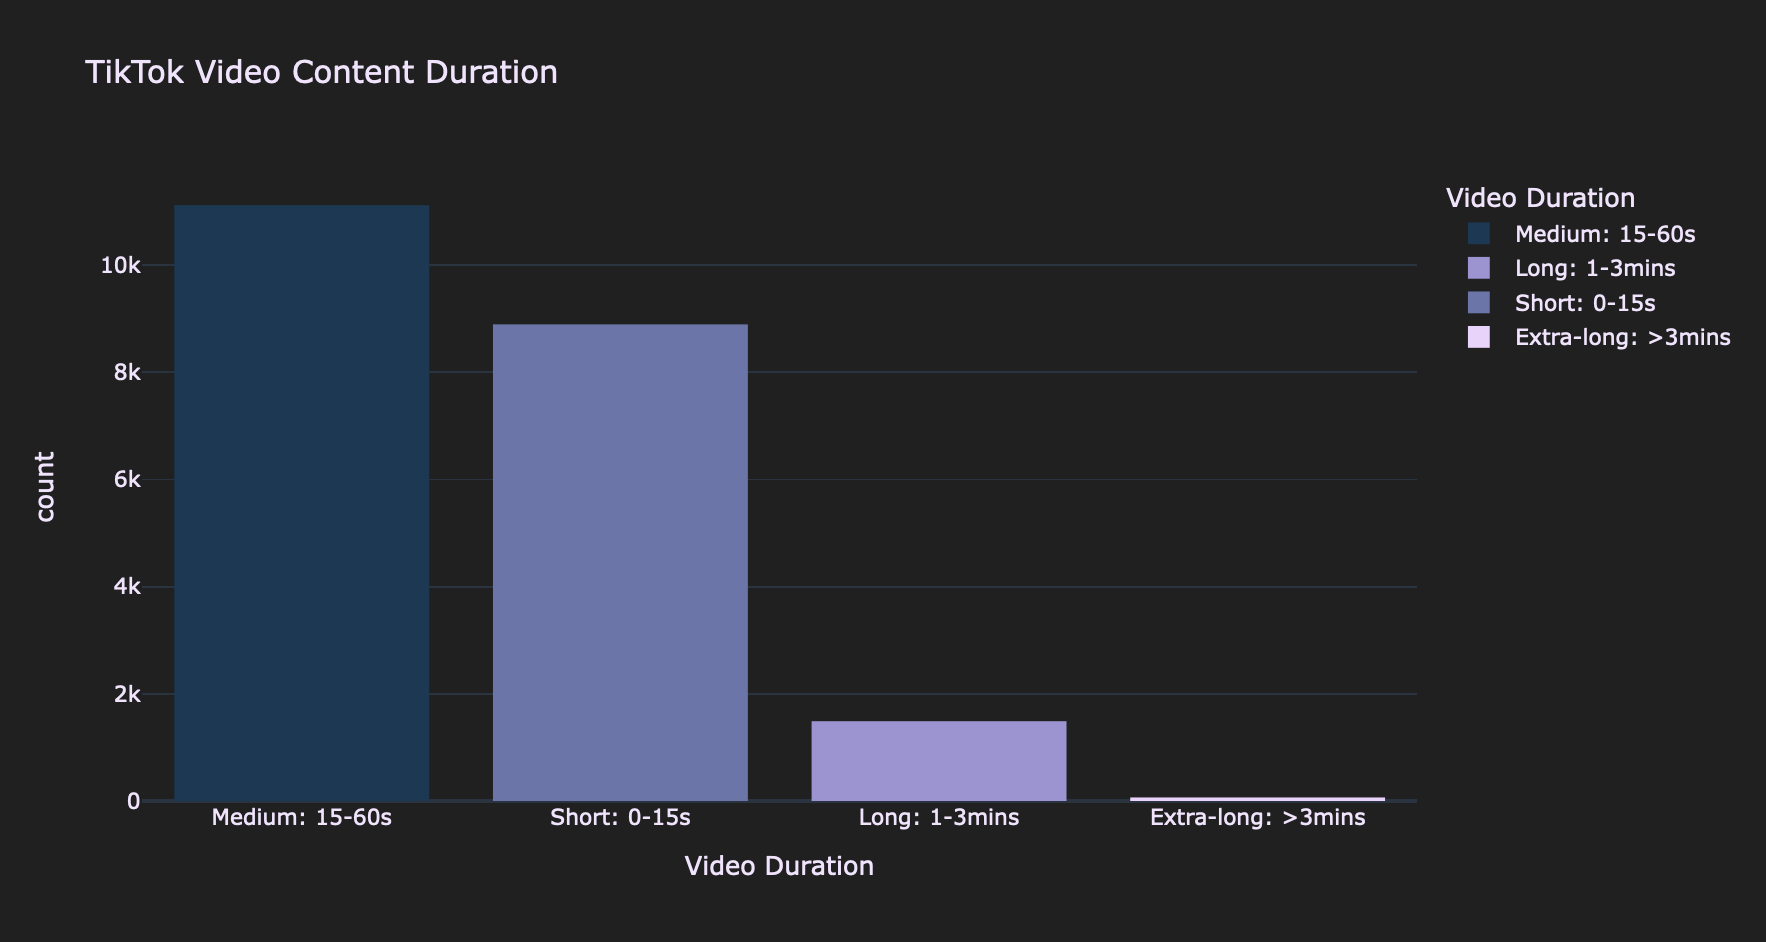

#### <h3><div class="alert alert-info">NOTES: Most videos have a medium length (15s - 60s), second-most being short videos (<15s).</div></h3>

## ▪️ Is the avg. video duration of a category more than the other? If so, which video length drives the highest engagement for each category?

<AxesSubplot:xlabel='category', ylabel='duration'>

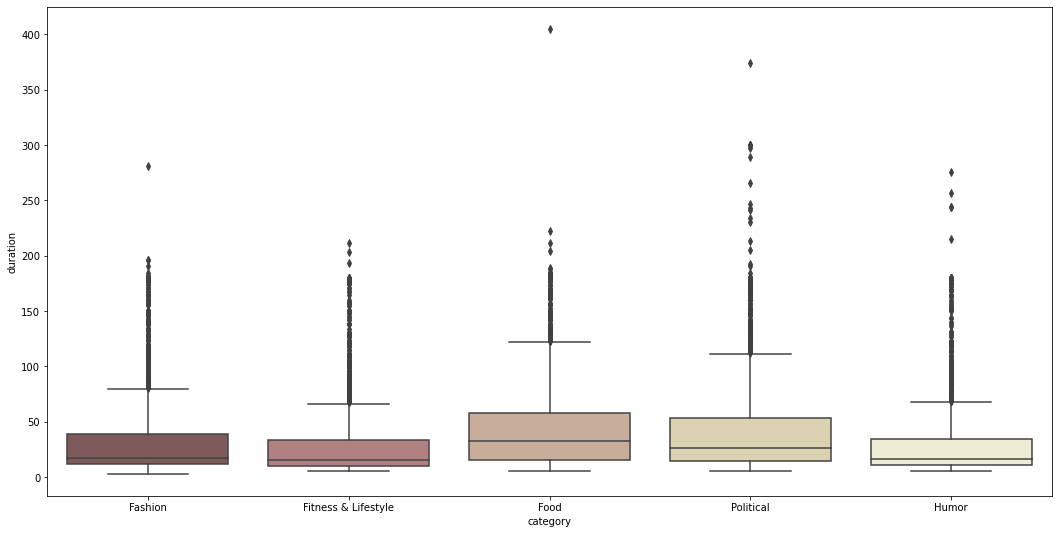

In [5]:
# overall length per category
plt.figure(figsize = (18, 9))
sns.boxplot(x=tiktok.category, y=tiktok.duration, palette = 'pink')

#### Engagement vs. Duration per Category

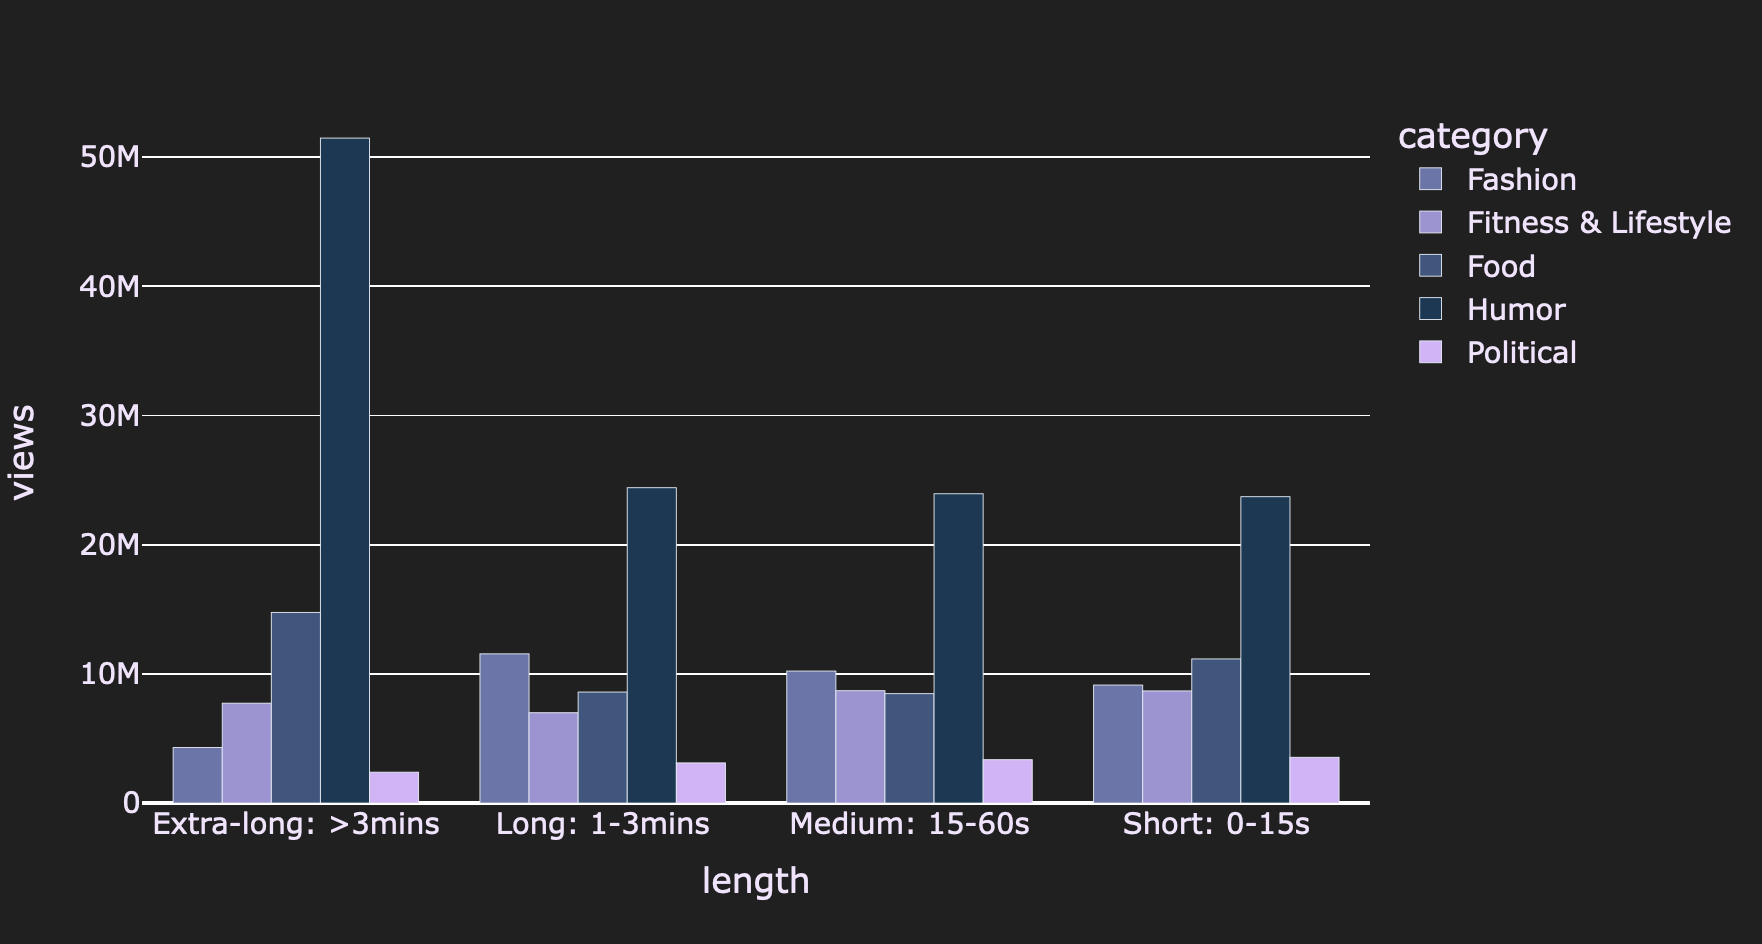

<h3><div class="alert alert-info">NOTES: Fashion's long videos have the most view;
Fitness & Lifetyle's medium and short videos have the most view; Food's extra-long videos have the most views; Humor extra long videos have the most views; Political content don't have signifant difference for different length.</div></h3>

## ▪️ What's the avg engagement metrics of trending vidoe's in the past two years? --- Univariate Analysis: Engagement

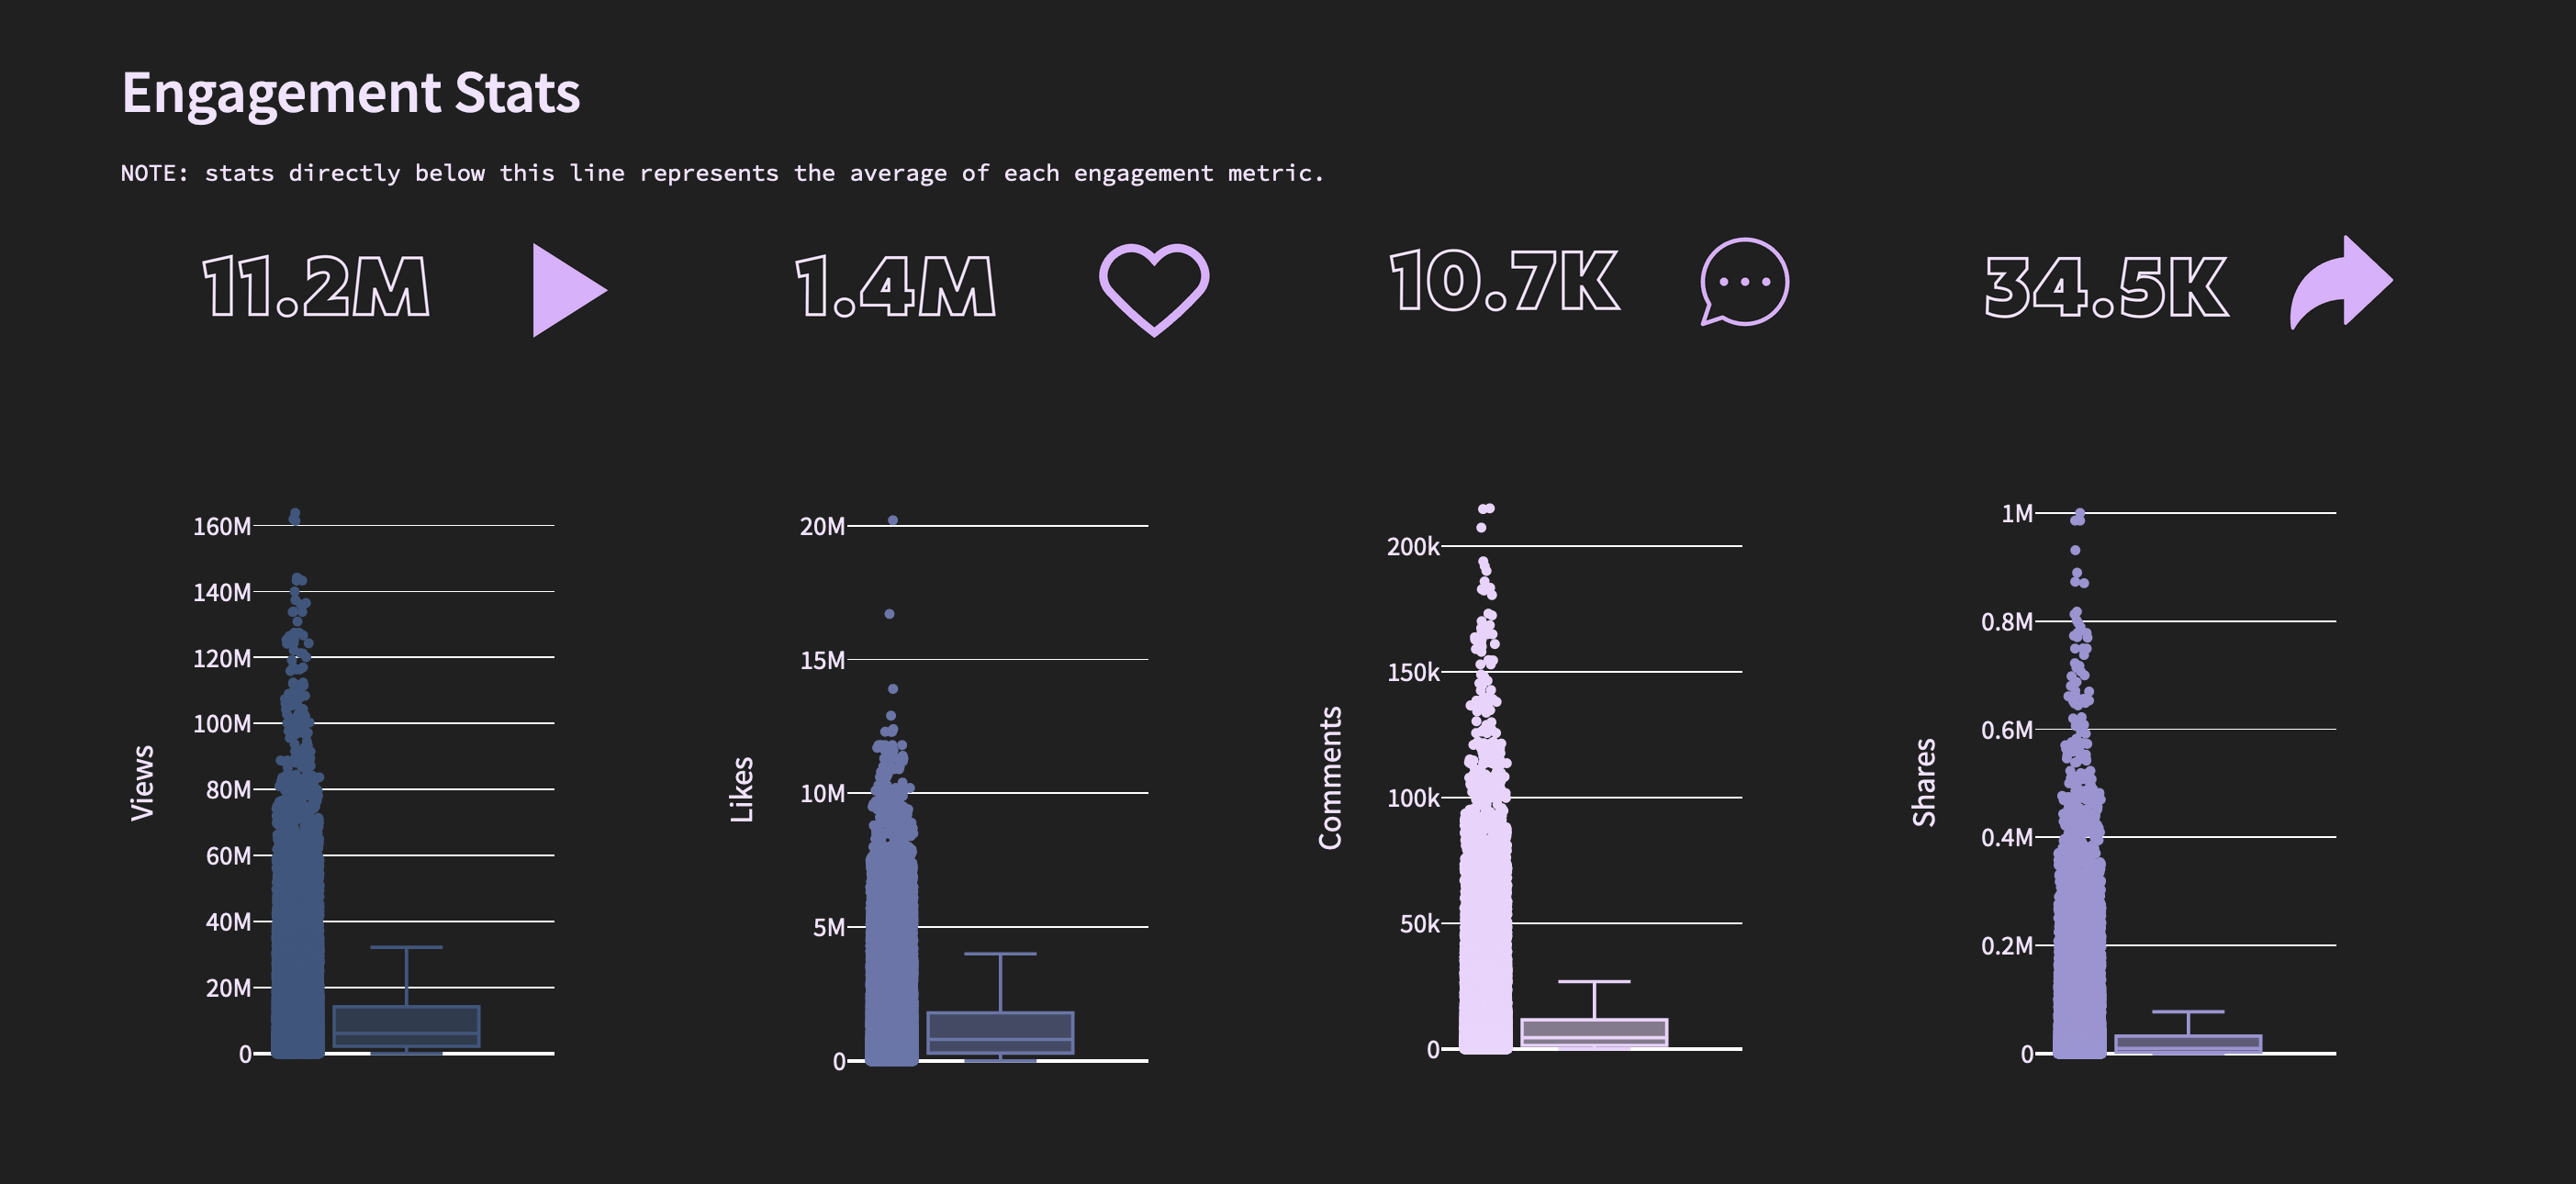

## ▪️Engagement metric vs. Category

<AxesSubplot:xlabel='category', ylabel='likes'>

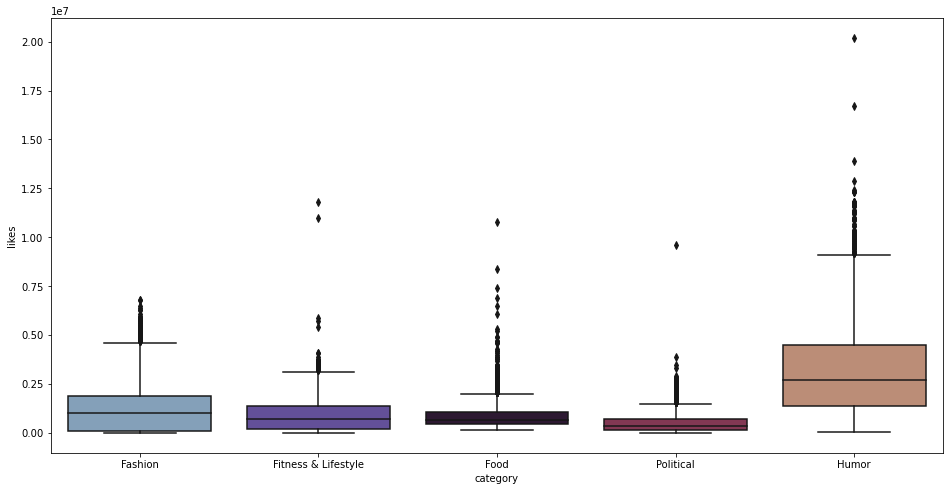

In [6]:
plt.figure(figsize = (16,8))
sns.boxplot(y=tiktok.likes, x= tiktok.category, orient = 'v',palette = 'twilight')

In [7]:
tiktok.groupby('category').likes.describe()

count       mean        std       min        25%  \
category                                                                 
Fashion             4387.00 1228321.68 1212376.94  10100.00   90750.00   
Fitness & Lifestyle 4059.00  913649.40  844451.89  13500.00  204050.00   
Food                4503.00  876808.19  654106.00 167900.00  460150.00   
Humor               4533.00 3095875.84 2313977.53  43700.00 1400000.00   
Political           4069.00  489491.70  488259.27   1620.00  164200.00   

                           50%        75%         max  
category                                               
Fashion             1000000.00 1900000.00  6800000.00  
Fitness & Lifestyle  717100.00 1400000.00 11800000.00  
Food                 687300.00 1100000.00 10800000.00  
Humor               2700000.00 4500000.00 20200000.00  
Political            360900.00  707300.00  9600000.00

#### ▪️ Views

In [8]:
tiktok.views.describe()

count       21551.00
mean     11209014.17
std      15314079.98
min          4906.00
25%       2100000.00
50%       6100000.00
75%      14200000.00
max     262600000.00
Name: views, dtype: float64

<AxesSubplot:xlabel='category', ylabel='views'>

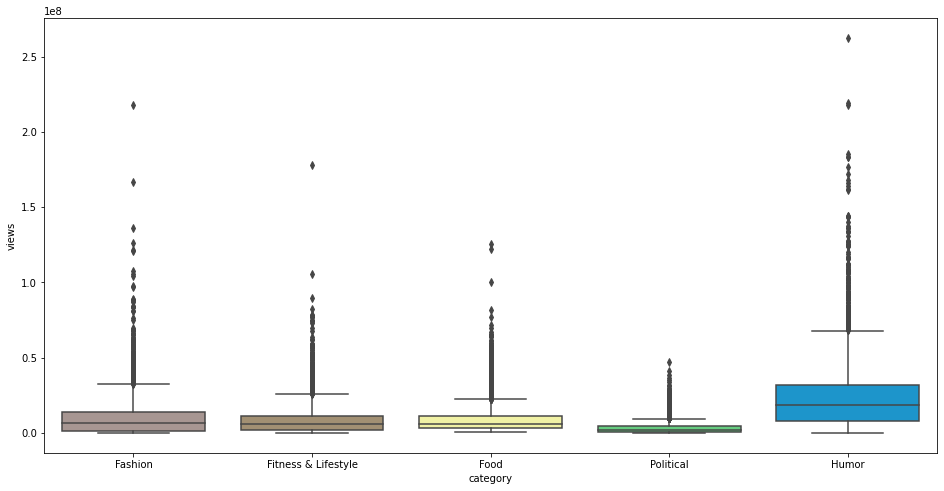

In [9]:
plt.figure(figsize = (16,8))
sns.boxplot(y=tiktok.views, x= tiktok.category, orient = 'v',palette = 'terrain_r')

In [10]:
tiktok.groupby('category').views.describe()

count        mean         std       min        25%  \
category                                                                   
Fashion             4387.00  9770807.02 12833742.53  35200.00 1100000.00   
Fitness & Lifestyle 4059.00  8618078.20 10320949.36  27200.00 1900000.00   
Food                4503.00  9237421.21  9602552.65 571100.00 3600000.00   
Humor               4533.00 23891899.10 22940566.09  70100.00 8300000.00   
Political           4069.00  3396920.19  4081792.34   4906.00  867700.00   

                            50%         75%          max  
category                                                  
Fashion              6400000.00 13700000.00 218100000.00  
Fitness & Lifestyle  5700000.00 11500000.00 178100000.00  
Food                 6100000.00 11100000.00 125300000.00  
Humor               18300000.00 32200000.00 262600000.00  
Political            2200000.00  4400000.00  47000000.00

#### ▪️Comments

In [11]:
tiktok.comments.describe()

count    21551.00
mean     10632.57
std      19294.79
min          0.00
25%       1402.00
50%       4478.00
75%      11600.00
max     578700.00
Name: comments, dtype: float64

<AxesSubplot:xlabel='category', ylabel='comments'>

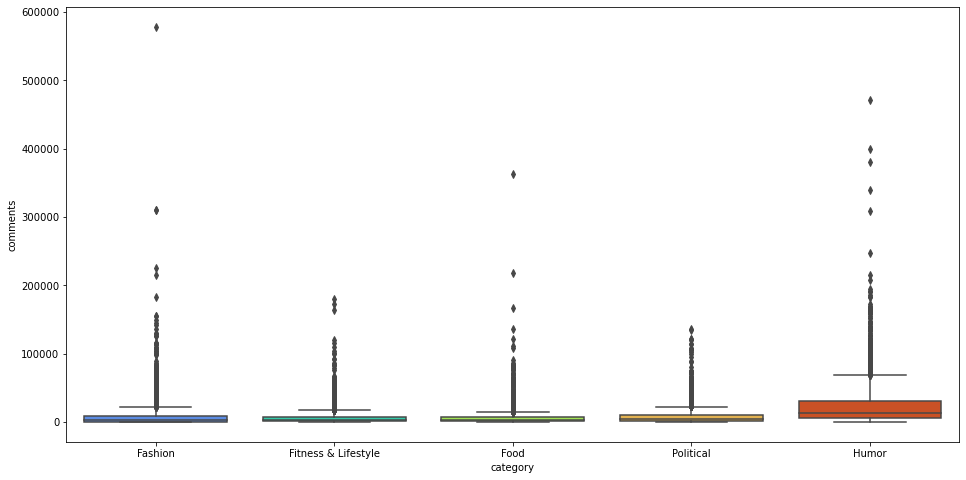

In [12]:
plt.figure(figsize = (16,8))
sns.boxplot(y=tiktok.comments, x= tiktok.category, orient = 'v',palette = 'turbo')

In [13]:
tiktok.groupby('category').comments.describe()

count     mean      std  min     25%      50%      75%  \
category                                                                       
Fashion             4387.00  8363.59 18744.48 0.00  513.50  2990.00  9230.00   
Fitness & Lifestyle 4059.00  6103.54 10564.55 0.00  830.00  2916.00  7291.00   
Food                4503.00  6293.22 11362.04 0.00 1630.00  3299.00  6885.00   
Humor               4533.00 23433.33 29420.58 0.00 5438.00 13800.00 30800.00   
Political           4069.00  8138.50 11797.52 0.00 1492.00  4504.00 10000.00   

                          max  
category                       
Fashion             578700.00  
Fitness & Lifestyle 180600.00  
Food                363300.00  
Humor               471200.00  
Political           136700.00

#### ▪️ Shares

In [14]:
tiktok.shares.describe()

count     21551.00
mean      34360.89
std       88387.40
min           0.00
25%        2371.50
50%        9527.00
75%       32300.00
max     7000000.00
Name: shares, dtype: float64

<AxesSubplot:xlabel='category', ylabel='shares'>

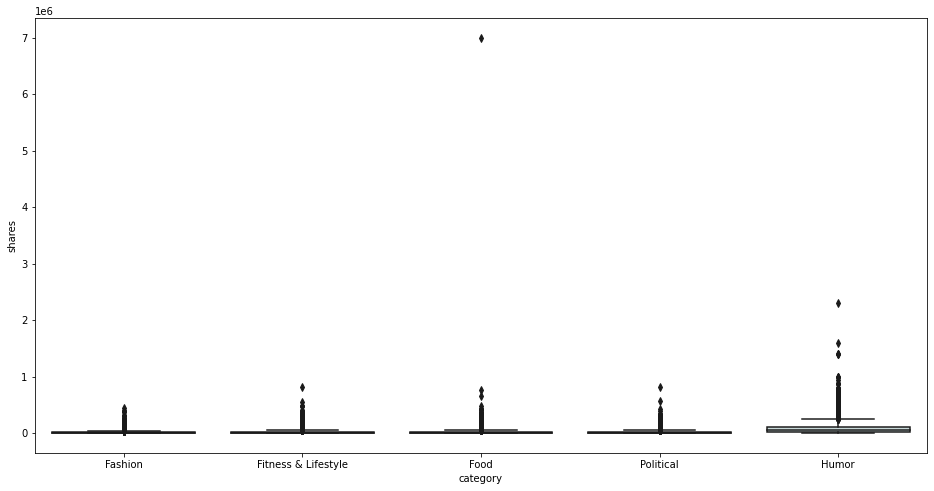

In [15]:
plt.figure(figsize = (16,8))
sns.boxplot(y=tiktok.shares, x= tiktok.category, orient = 'v',palette = 'bone')

In [16]:
tiktok.groupby('category').shares.describe()

count     mean       std   min      25%      50%  \
category                                                                 
Fashion             4387.00 14520.56  30583.17  0.00   929.00  4072.00   
Fitness & Lifestyle 4059.00 20283.06  41842.65  2.00  1840.00  6453.00   
Food                4503.00 24293.28 112071.39 61.00  2889.50  8703.00   
Humor               4533.00 89858.32 130553.68 46.00 14000.00 45300.00   
Political           4069.00 19110.46  36647.05  1.00  1550.00  7538.00   

                          75%        max  
category                                  
Fashion              14550.00  434400.00  
Fitness & Lifestyle  20350.00  812700.00  
Food                 25750.00 7000000.00  
Humor               110900.00 2300000.00  
Political            21400.00  817300.00

#### <h3><div class="alert alert-info">NOTES: Videos in humor category has significantly more engagement than other categories on average.</div></h3>

## ▪️Engagement vs. duration per Category

### <span style='background :orange' >Likes</span>

<AxesSubplot:xlabel='duration', ylabel='likes'>

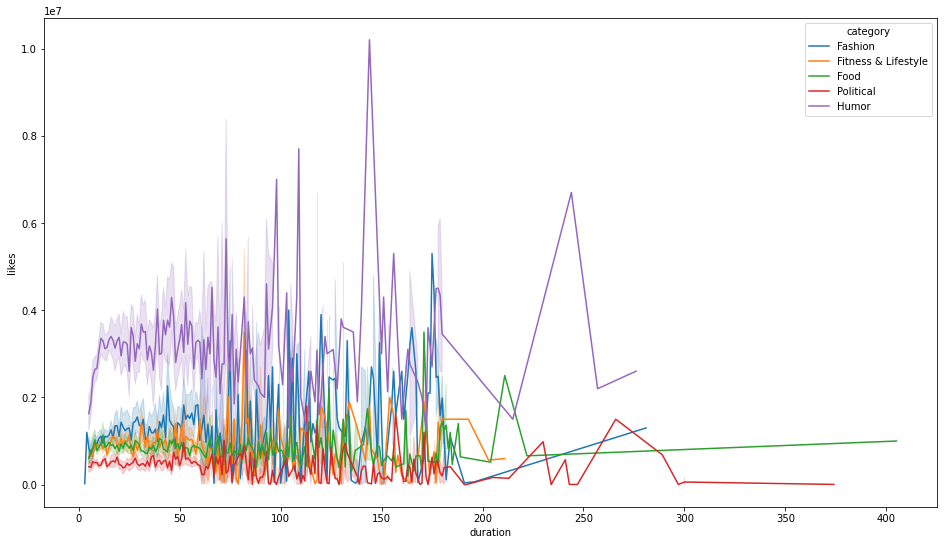

In [17]:
# visualizing duration and like count
plt.figure(figsize = (16,9))
sns.lineplot(x=tiktok.duration, y=tiktok.likes, hue = tiktok.category)

#### Hypothesis Testing
Ho = duration does not correlate with like counts

Ha = duration does correlate with like counts

In [18]:
x = tiktok.duration
y = y=tiktok.likes
r,p = stats.pearsonr(x, y)

print('p=', p)
print('r=', r)

p= 0.0008402621370572133
r= -0.022744431202713824


#### ▪️ Views

<AxesSubplot:xlabel='duration', ylabel='views'>

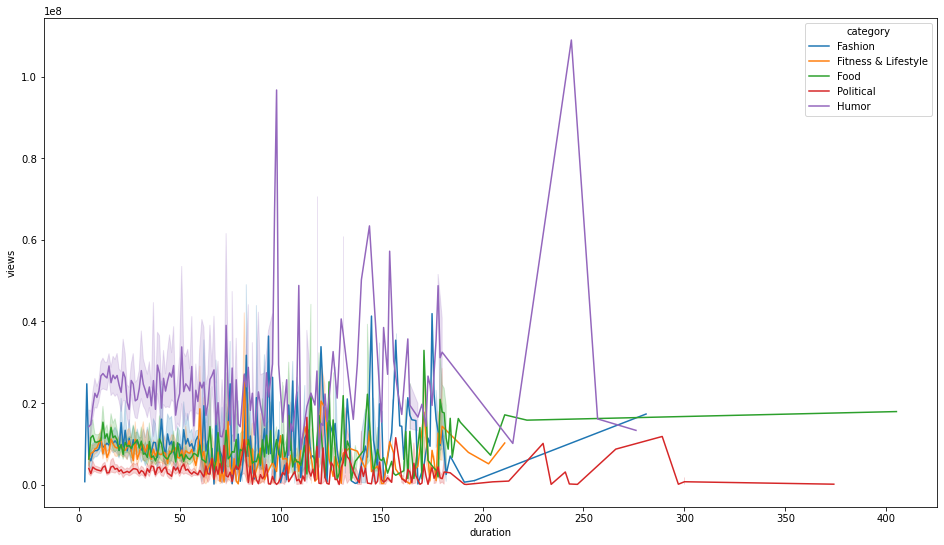

In [19]:
# visualizing duration and like count
plt.figure(figsize = (16,9))
sns.lineplot(x=tiktok.duration, y=tiktok.views, hue = tiktok.category)

#### Hypothesis Testing
Ho = duration does not correlate with view counts

Ha = duration does correlate with view counts


In [20]:
x = tiktok.duration
y = tiktok.views
r,p = stats.pearsonr(x, y)

print('p=', p)
print('r=', r)

p= 3.2225423745393995e-13
r= -0.04959514058388878


#### <span style="color: blue"><b>▪️ Comments</b></span>

<AxesSubplot:xlabel='duration', ylabel='comments'>

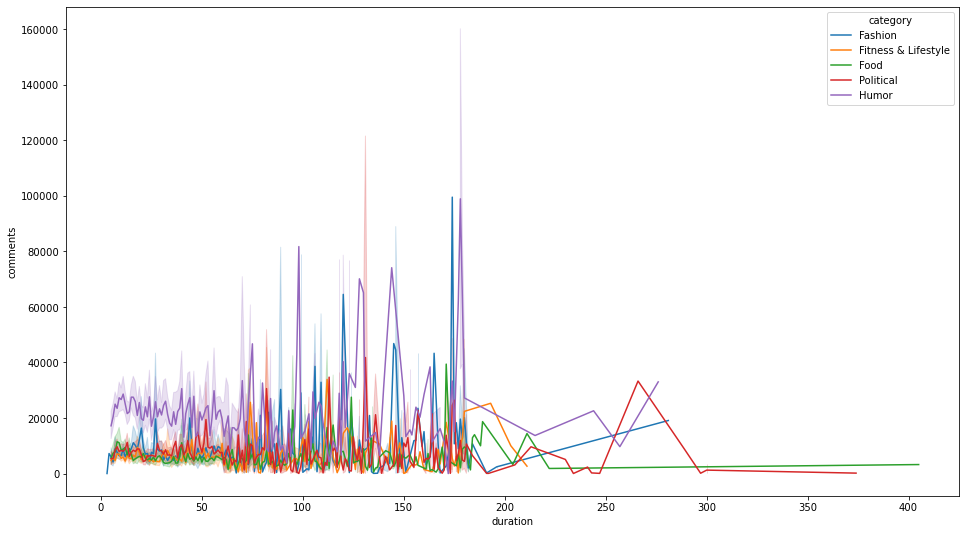

In [21]:
# visualizing duration and like count
plt.figure(figsize = (16,9))
sns.lineplot(x=tiktok.duration, y=tiktok.comments, hue = tiktok.category)

#### Hypothesis Testing
Ho = duration does not correlate with comment counts

Ha = duration does correlate with comment counts


In [22]:
x = tiktok.duration
y = tiktok.comments
r,p = stats.pearsonr(x, y)

print('p=', p)
print('r=', r)

p= 8.404837493406532e-06
r= -0.030338950728029855


#### <span style="color: blue"><b>▪️ Shares</b></span>

<AxesSubplot:xlabel='duration', ylabel='shares'>

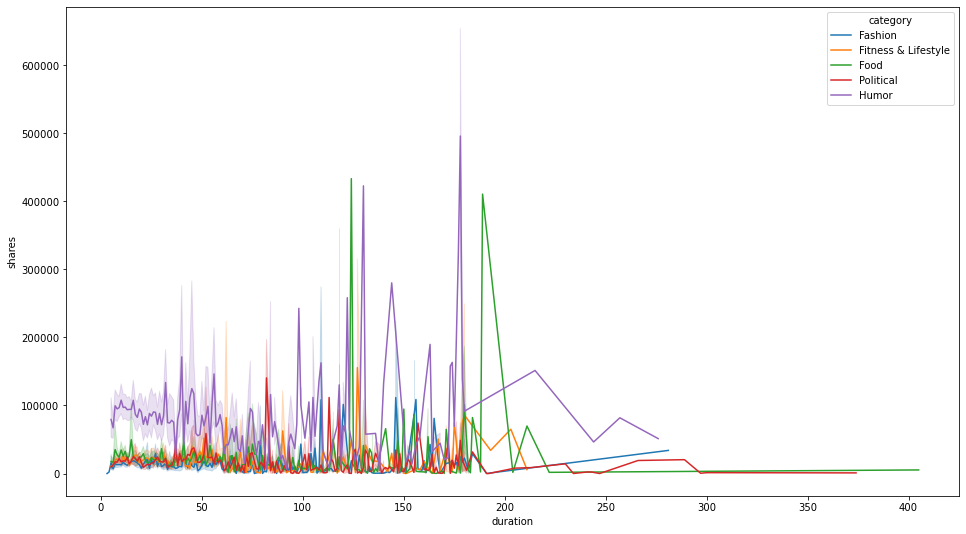

In [23]:
# visualizing duration and like count
plt.figure(figsize = (16,9))
sns.lineplot(x=tiktok.duration, y=tiktok.shares, hue = tiktok.category)

#### Hypothesis Testing
Ho = duration does not correlate with share counts

Ha = duration does correlate with share counts

In [24]:
x = tiktok.duration
y = tiktok.shares
r,p = stats.pearsonr(x, y)

print('p=', p)
print('r=', r)

p= 8.709982757491764e-07
r= -0.03349840248396695


#### <h3><div class="alert alert-info">NOTES: Engagement has a very weak inverse correlation with duration</div></h3>

## ▪️ How does Tiktok compare to another social media platform, such as YouTube?

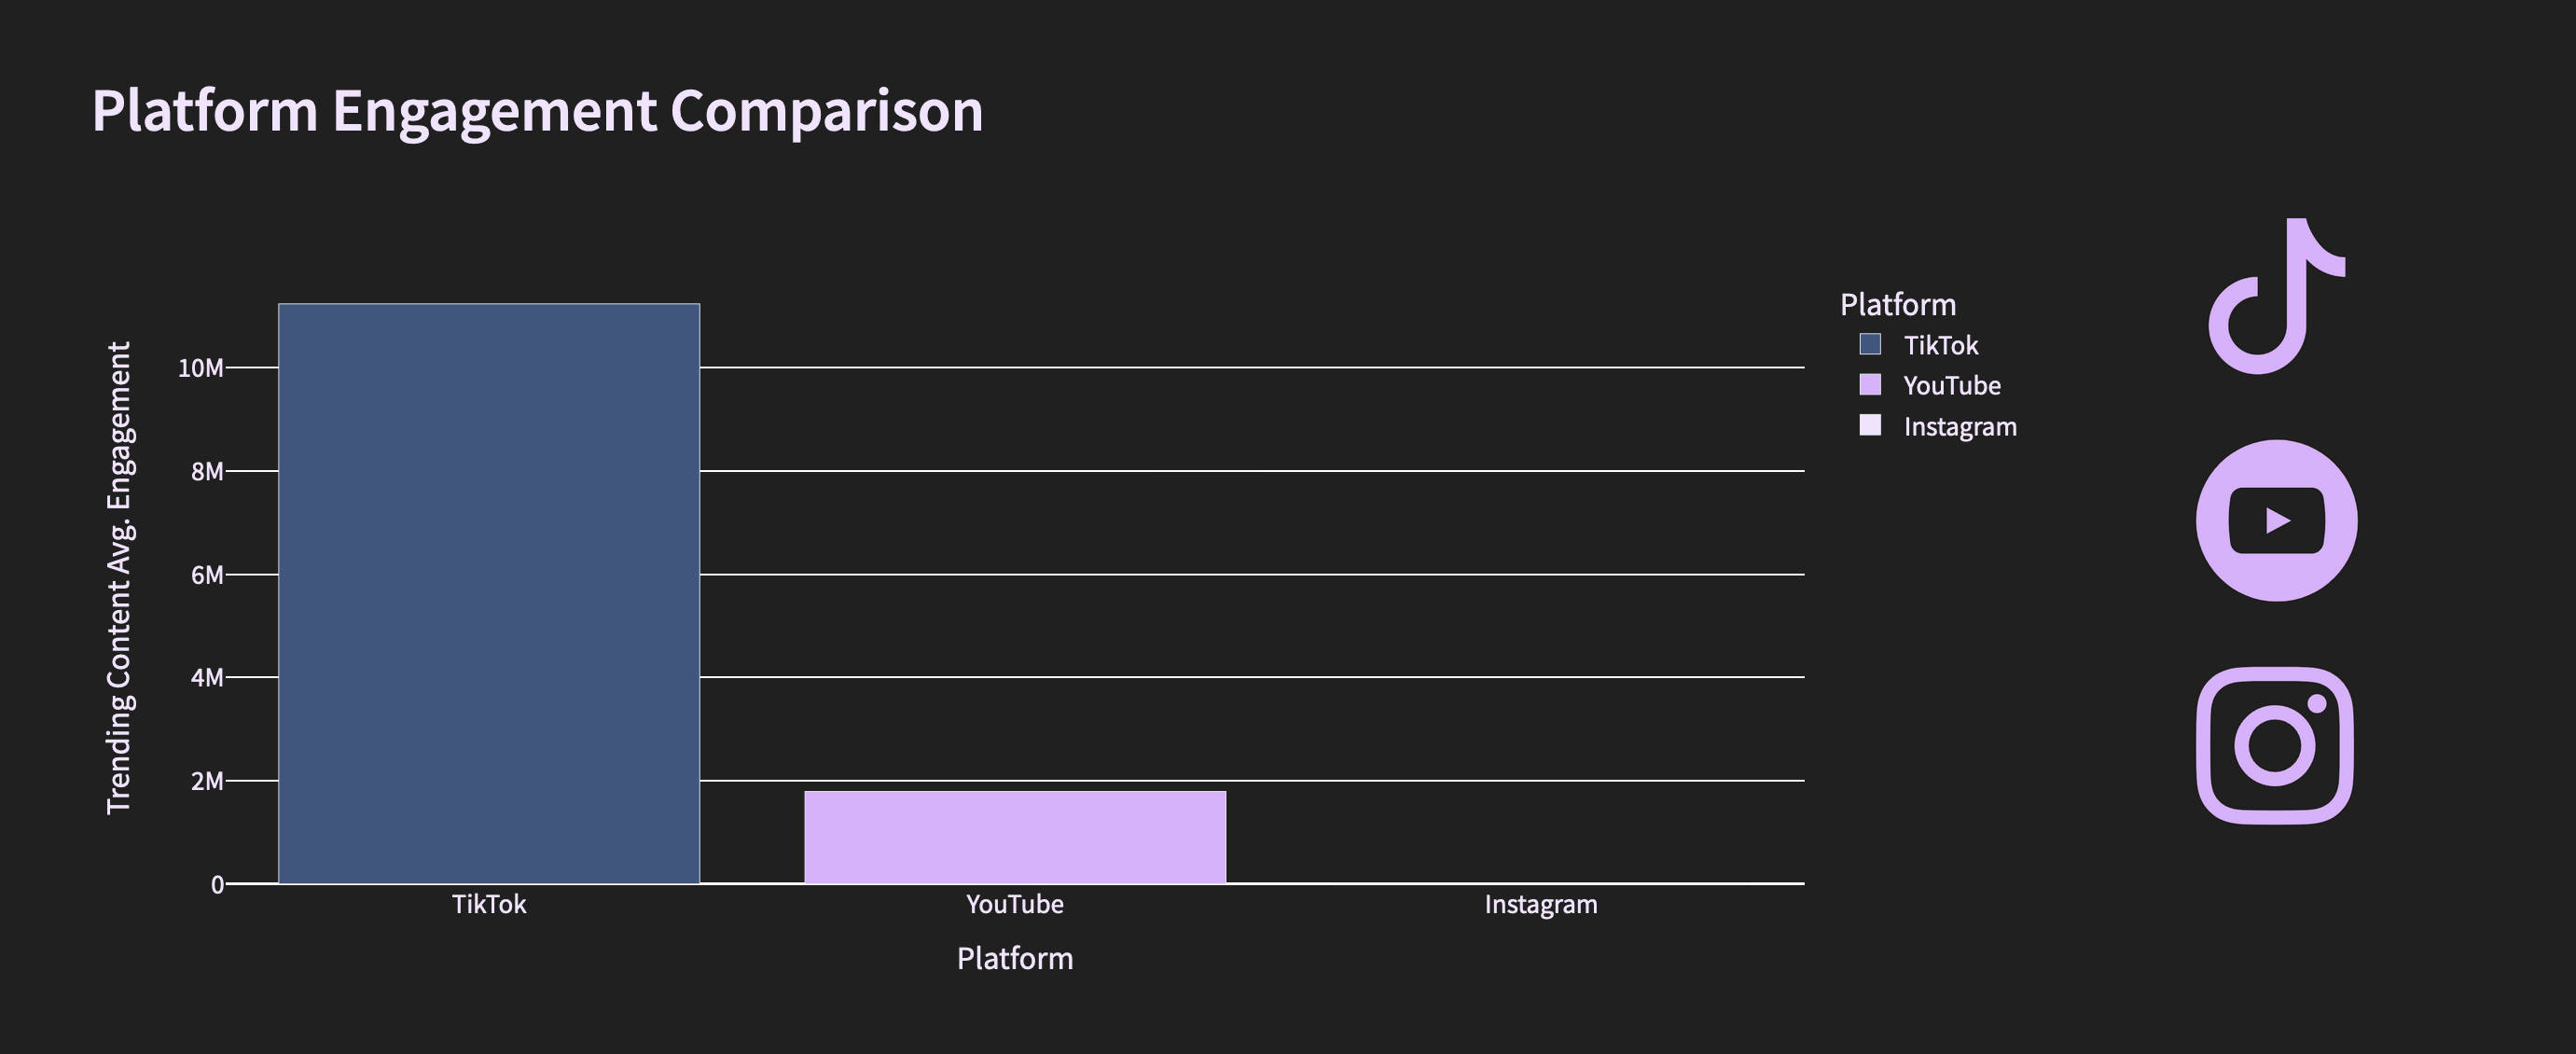

#### <h3><div class="alert alert-info">NOTES:TikTok's engagement is 6x more than YouTube, 1000x more than Instagram.</div></h3>

## ▪️ TikTok vs. YouTube Monthly Average Views

In [25]:
# These csv files were prepared in the 'eda_jess.ipynb'
# Please reference that file for more information
b_fit_m = pd.read_csv('m_comp_fit.csv')
b_fas_m = pd.read_csv('m_comp_fas.csv')
b_hum_m = pd.read_csv('m_comp_hum.csv')
b_fod_m = pd.read_csv('m_comp_fod.csv')

In [26]:
b_fit_m['date'] = pd.to_datetime(b_fit_m['date'])
b_fas_m['date'] = pd.to_datetime(b_fas_m['date'])
b_hum_m['date'] = pd.to_datetime(b_hum_m['date'])
b_fod_m['date'] = pd.to_datetime(b_fod_m['date']);

In [27]:
b_fit_m.set_index('date', inplace = True)
b_fas_m.set_index('date', inplace = True)
b_hum_m.set_index('date', inplace = True)
b_fod_m.set_index('date', inplace = True)

<AxesSubplot:title={'center':'Fashion'}, xlabel='date'>

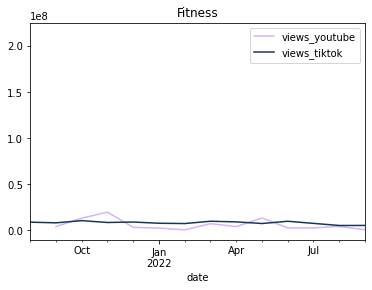

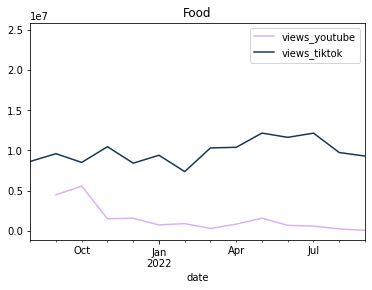

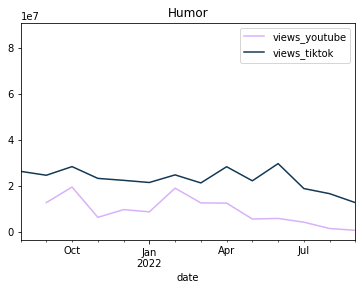

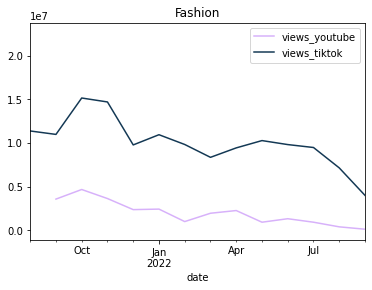

In [28]:
b_fit_m.plot(xlim = ('2021-08-19 00:00:00+00:00', '2022-09-11 00:00:00+00:00'), color = ['#D7B1FA','#133854'], title = 'Fitness')
b_fod_m.plot(xlim = ('2021-08-19 00:00:00+00:00', '2022-09-11 00:00:00+00:00'), color = ['#D7B1FA','#133854'], title = 'Food')
b_hum_m.plot(xlim = ('2021-08-19 00:00:00+00:00', '2022-09-11 00:00:00+00:00'), color = ['#D7B1FA','#133854'], title = 'Humor')
b_fas_m.plot(xlim = ('2021-08-19 00:00:00+00:00', '2022-09-11 00:00:00+00:00'), color = ['#D7B1FA','#133854'], title = 'Fashion')

#### <h3><div class="alert alert-info">NOTES: TikTok tends to lead in number of views for most categories.</div></h3>

<h1 align="center">Modeling</h1>

## Algorithms:
- Last Observed Value (Baseline)
- Moving Average: The future will look, on average, like recent history.
- Holt's Linear Trend
- Previous Cycle
- Facebook Prophet
- ARIMA
- Long Short Term Memory Neural Network

In [29]:
df = pd.read_csv('tiktok_data.csv')
# use prepare function to clean
df = prepare.prep_tiktok3(tiktok)

# set timt as index
df.set_index('date', inplace=True)
df = df.sort_index()

# trim off date range
df = df[df.index>='2018-12-01']
df = df[df.index<='2022-09-10']

# resample on day
resample = df.resample('w')[['comments', 'likes', 'views', 'shares']].sum()

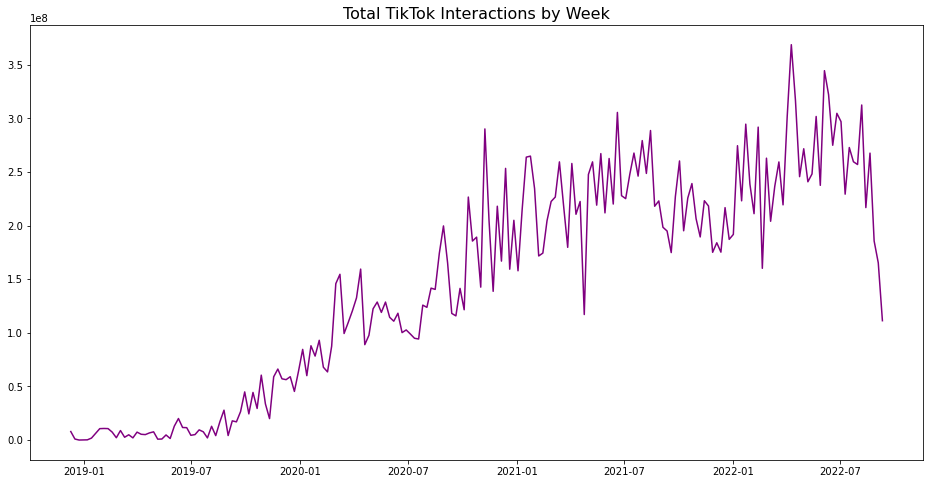

In [30]:
# Sum Total of Interactions
plt.figure(figsize = (16,8))
plt.title('Total TikTok Interactions by Week', fontsize = 16, color = 'black')
plt.plot(resample.index, resample.likes, color = 'purple')

# Split Data

- We will use the training proportion method to split.
- Identify the total length of the dataframe and multiply by train_prop to get the number of rows that equates to the first x% of the dataframe, which equates to the first x% of the time covered in the data. (x = train_prop * 100)
- Select row indices from 0 up to the index representing x-percentile for train, and from the index representing x-percentile through the end of the dataframe for test. In both of these, we will reset the index in order to return dataframes sorted by datetime.
- Return train and test dataframes.

In [31]:
# check df size
resample.shape

(197, 4)

In [32]:
# set train size to be 50% of total 
train_size = int(round(resample.shape[0] * 0.5)+1)
train = resample[:train_size]

In [33]:
# set validate size to be 30% of total 
validate_size = int(round(resample.shape[0] * 0.3))
validate_end_index = train_size + validate_size
validate = resample[train_size:validate_end_index]

In [34]:
# set test size to be number of rows remaining. 
test_size = int(round(resample.shape[0] * 0.2))
test = resample[validate_end_index:]

In [35]:
#Further verification steps were taken. 
#These additional verification steps can be found in the modeling.ipynb
len(resample) == train_size + validate_size + test_size

True

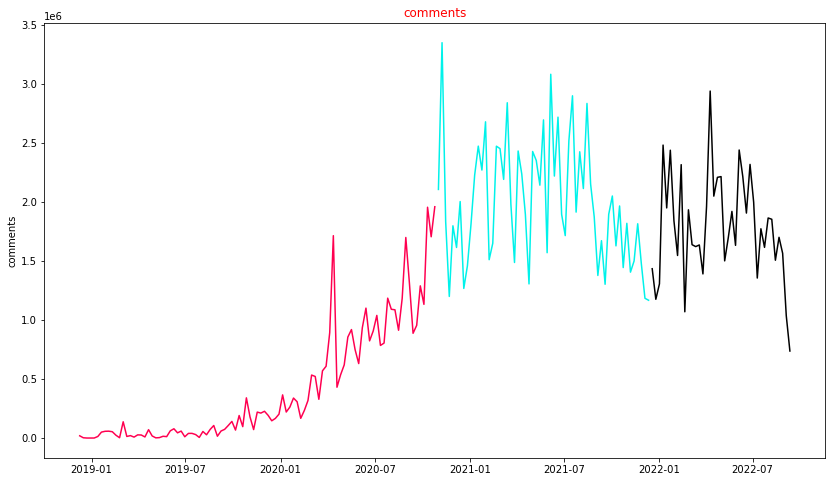

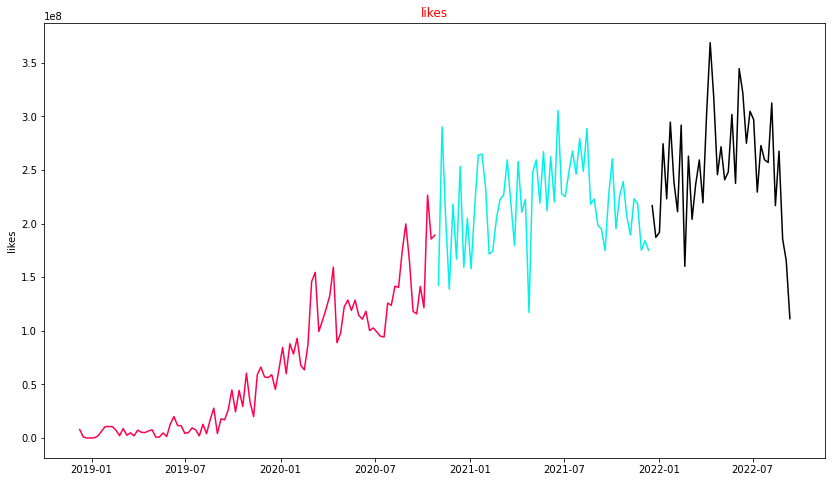

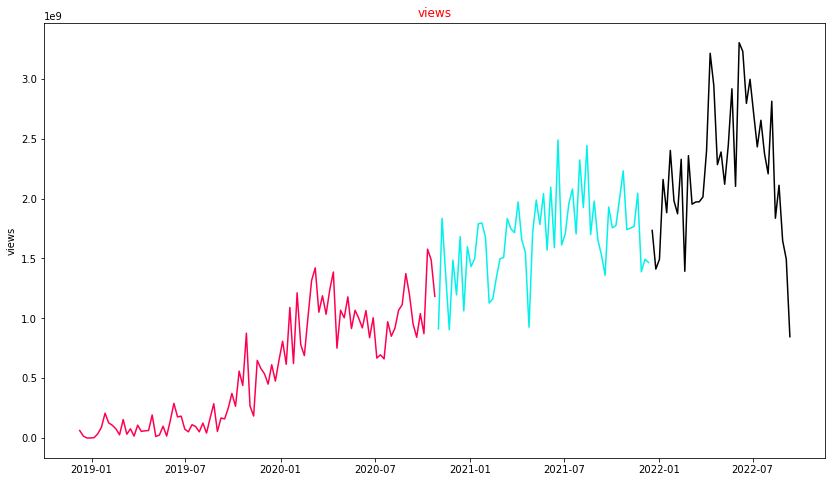

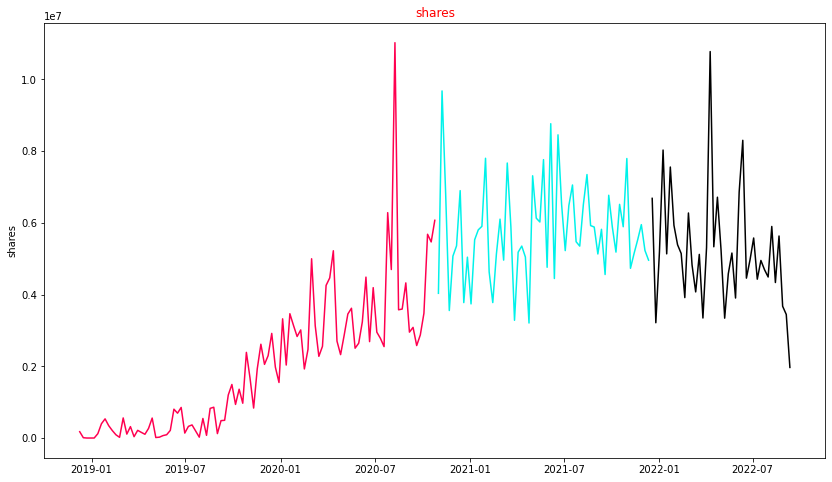

In [36]:
for col in train.columns:
    plt.figure(figsize=(14,8))
    plt.plot(train[col], color = '#ff0050')
    plt.plot(validate[col], color = '#00f2ea')
    plt.plot(test[col], color = '#000000')
    plt.ylabel(col)
    plt.title(col, color = 'red')
    plt.show()

In [37]:
# import modeling functions
import modeling_func

## Baseline - Last Observed Value

#### Views

In [38]:
train['views'][-1:][0]

1183640000

In [39]:
# take the last item of sales total and assign to variable
last_views = train['views'][-1:][0]

#### Likes

In [40]:
# take the last item of quantity and assign to variable
last_likes = train['likes'][-1:][0]

In [41]:
#organize predictions into 'yhat_df' dataframe
yhat_df = pd.DataFrame(
    {'views': [last_views],
     'likes': [last_likes]},
    index=validate.index)

#### Plot Actual vs. Predicted Values

In [42]:
modeling_func.plot_and_eval('views', train, validate, yhat_df)

views -- RMSE: 599773169


#### Evaluate

In [43]:
eval_df=pd.DataFrame()
for col in train[['views', 'likes']]:
    evals = modeling_func.append_eval_df(validate, yhat_df, model_type = 'last_observed_value', 
                             target_var = col)

    eval_df = eval_df.append(evals)
eval_df

model_type target_var         rmse
0  last_observed_value      views 599773169.00
0  last_observed_value      likes  49665961.00

In [44]:
min_views_rmse = eval_df[eval_df.target_var == 'views']['rmse'].min()
min_views_rmse

599773169.0

In [45]:
min_likes_rmse = eval_df[eval_df.target_var == 'likes']['rmse'].min()
min_likes_rmse

49665961.0

## Moving Average

In this example, we will use a 30-day moving average to forecast. In other words, the average over the last 30-days will be used as the forecasted value.

#### Make Predictions

In [46]:
period=30
train['views'].rolling(period).mean()[-1]

1030266475.5333333

In [47]:
period = 30 

# take 30 day rolling average, then take the last element and that will the one that propogates 
# forward as our prediction. 
rolling_views = round(train['views'].rolling(period).mean()[-1], 2)
rolling_likes = round(train['likes'].rolling(period).mean()[-1], 2)
print(rolling_views, rolling_likes)

1030266475.53 132685506.53


In [48]:
yhat_df = modeling_func.make_predictions(validate, rolling_views, rolling_likes)
yhat_df.head()

views        likes
date                                 
2020-11-01 1030266475.53 132685506.53
2020-11-08 1030266475.53 132685506.53
2020-11-15 1030266475.53 132685506.53
2020-11-22 1030266475.53 132685506.53
2020-11-29 1030266475.53 132685506.53

#### Plot Actual vs. Predicted Values

Now, let's plot and evaluate the performance of our time series model using **Moving Average**

In [49]:
for col in train[['views', 'likes']]:
    modeling_func.plot_and_eval(col, train, validate, yhat_df)

views -- RMSE: 730849085


likes -- RMSE: 95132821


#### Evaluate

In [50]:
for col in train[['views', 'likes']]:
    evals = modeling_func.append_eval_df(validate, yhat_df, model_type = '30d_moving_avg', 
                            target_var = col)
    eval_df = eval_df.append(evals)

eval_df

model_type target_var         rmse
0  last_observed_value      views 599773169.00
0  last_observed_value      likes  49665961.00
0       30d_moving_avg      views 730849085.00
0       30d_moving_avg      likes  95132821.00

Let's try out several other values for periods:

In [51]:
periods = [4, 12, 26, 52, 104]
l = pd.DataFrame()
for p in periods: 
    rolling_sales = round(train['views'].rolling(p).mean()[-1], 2)
    rolling_quantity = round(train['likes'].rolling(p).mean()[-1], 2)
    yhat_df = modeling_func.make_predictions(validate, rolling_views, rolling_likes)
    model_type = str(p) + '_day_moving_avg'
    for col in train[['views', 'likes']]:
        evals = modeling_func.append_eval_df(validate, yhat_df, model_type = model_type,
                                target_var = col)
        eval_df = eval_df.append(evals)

In [52]:
# which is best so far?
eval_df

model_type target_var         rmse
0  last_observed_value      views 599773169.00
0  last_observed_value      likes  49665961.00
0       30d_moving_avg      views 730849085.00
0       30d_moving_avg      likes  95132821.00
0     4_day_moving_avg      views 730849085.00
0     4_day_moving_avg      likes  95132821.00
0    12_day_moving_avg      views 730849085.00
0    12_day_moving_avg      likes  95132821.00
0    26_day_moving_avg      views 730849085.00
0    26_day_moving_avg      likes  95132821.00
0    52_day_moving_avg      views 730849085.00
0    52_day_moving_avg      likes  95132821.00
0   104_day_moving_avg      views 730849085.00
0   104_day_moving_avg      likes  95132821.00

In [53]:
# min rmse for views
min_views_rmse = eval_df[eval_df.target_var == 'views']['rmse'].min()

In [54]:
min_views_rmse

599773169.0

In [55]:
eval_df[eval_df.rmse == min_views_rmse]

model_type target_var         rmse
0  last_observed_value      views 599773169.00

In [56]:
# min rmse for likes
min_likes_rmse = eval_df[eval_df.target_var == 'likes']['rmse'].min()

In [57]:
min_likes_rmse

49665961.0

## Holt's Linear Trend

In [58]:
col = 'views' 
# create our Holt's Object
model = Holt(train[col], exponential=False, damped=True)

In [59]:
# fit the holt's object
model = model.fit(optimized=True)

In [60]:
for col in train[['views', 'likes']]:
    model = Holt(train[col], exponential=False, damped=True)
    model = model.fit(optimized=True)
    yhat_items = model.predict(start = validate.index[0],
                              end = validate.index[-1])
    yhat_df[col] = round(yhat_items, 2)

#### Plot Actual vs. Predicted Values

In [61]:
for col in train[['views', 'likes']]:
    modeling_func.plot_and_eval(col, train, validate, yhat_df)

views -- RMSE: 349329760


likes -- RMSE: 72559877


#### Evaluate

In [62]:
for col in train[['views', 'likes']]:
    evals = modeling_func.append_eval_df(validate, yhat_df, model_type = 'holts_optimized', 
                            target_var = col)
    eval_df = eval_df.append(evals)

In [63]:
summ = eval_df[eval_df.target_var =='views'].sort_values(by='rmse').head(10)

In [64]:
summ

model_type target_var         rmse
0      holts_optimized      views 349329760.00
0  last_observed_value      views 599773169.00
0       30d_moving_avg      views 730849085.00
0     4_day_moving_avg      views 730849085.00
0    12_day_moving_avg      views 730849085.00
0    26_day_moving_avg      views 730849085.00
0    52_day_moving_avg      views 730849085.00
0   104_day_moving_avg      views 730849085.00

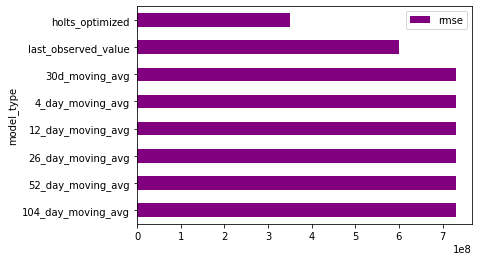

In [65]:
ax = summ.plot.barh(x = 'model_type', y = 'rmse', color = 'purple')
ax.invert_yaxis()

## Autoregressive Integrated Moving Average (ARIMA)

- First parameter:  the lagging (past values)
- Second parameter:  differencing (this is what makes non-stationary data stationary)
- Last parameter: white noise (for modeling shock events). 

In [66]:
from statsmodels.tsa.arima.model import ARIMA

In [67]:
from statsmodels.graphics.tsaplots import plot_acf

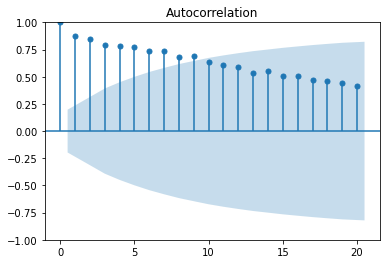

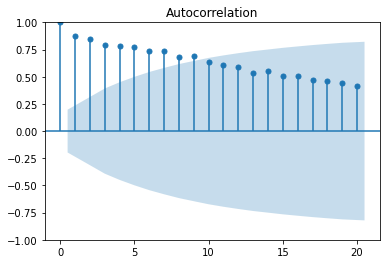

In [68]:
# autocorrelation plot
plot_acf(train.views)

#### 1st Order Differencing

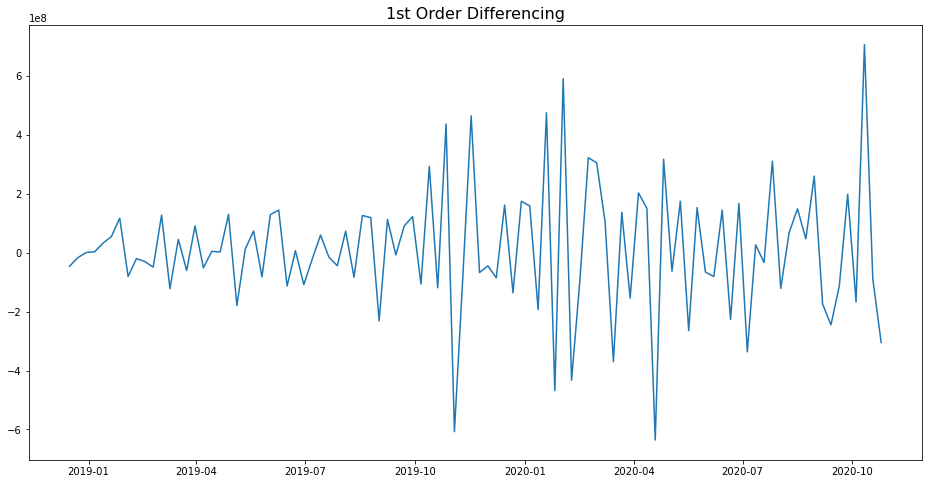

In [69]:
# visualize how the differencing segment of ARIMA makes the data stationary.
plt.figure(figsize =(16,8))
plt.title('1st Order Differencing', fontsize = 16)
plt.plot(train.views.diff())

<Figure size 1152x576 with 0 Axes>

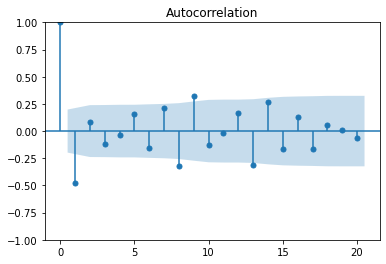

In [70]:
plt.figure(figsize = (16,8))
plot_acf(train.views.diff().dropna())
plt.show()

#### 2nd Order Differencing

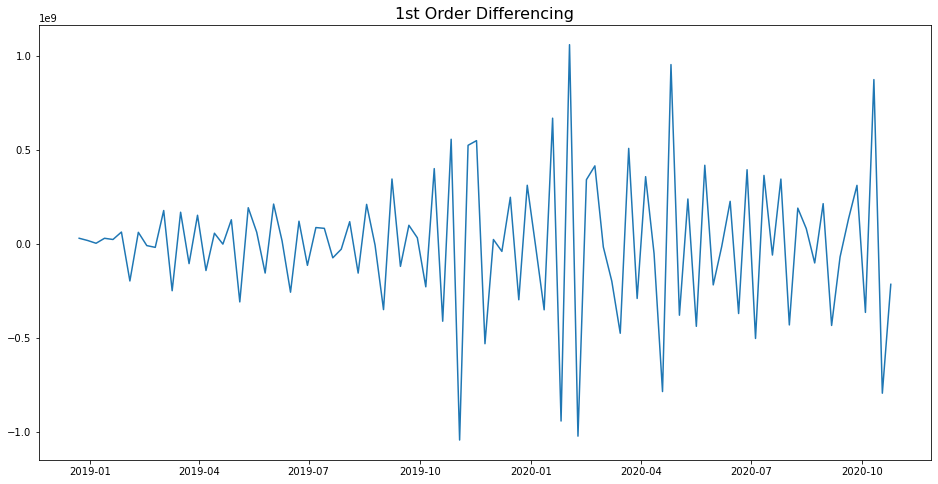

In [71]:
# visualize how the differencing segment of ARIMA makes the data stationary.
plt.figure(figsize =(16,8))
plt.title('1st Order Differencing', fontsize = 16)
plt.plot(train.views.diff().diff())

<Figure size 1152x576 with 0 Axes>

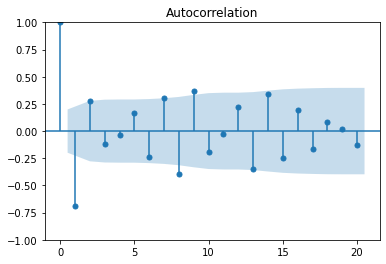

In [72]:
plt.figure(figsize = (16,8))
plot_acf(train.views.diff().diff().dropna())
plt.show()

In [73]:
# Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

In [74]:
result = adfuller(train.views.dropna())
print('p-value: ', result[1])

result = adfuller(train.views.diff().dropna())
print('p-value: ', result[1])

result = adfuller(train.views.diff().diff().dropna())
print('p-value: ', result[1])

p-value:  0.9108117394338779
p-value:  1.5858158373824085e-12
p-value:  1.9816398341497725e-08


#### Fit ARIMA Model

In [75]:
# (1,1,2)
arima_model = ARIMA(train.views, order = (1,1,2))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  views   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2004.182
Date:                Sat, 08 Oct 2022   AIC                           4016.364
Time:                        14:41:38   BIC                           4026.704
Sample:                    12-09-2018   HQIC                          4020.546
                         - 10-25-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4620      1.672     -0.276      0.782      -3.739       2.815
ma.L1         -0.1821      1.690     -0.108      0.914      -3.494       3.130
ma.L2         -0.2447      1.077     -0.227      0.8

In [76]:
# (1,1,1)
arima_model = ARIMA(train.views, order = (1,1,1))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  views   No. Observations:                   99
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2004.216
Date:                Sat, 08 Oct 2022   AIC                           4014.433
Time:                        14:41:38   BIC                           4022.188
Sample:                    12-09-2018   HQIC                          4017.570
                         - 10-25-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0415      0.139     -0.299      0.765      -0.313       0.230
ma.L1         -0.5939      0.114     -5.190      0.000      -0.818      -0.370
sigma2      3.622e+16        nan        nan        n

# Facebook Prophet
 - had issues loading, please see image pasted in below

In [77]:
fb_train = pd.DataFrame({'ds':train.index, 'y': train.views})

In [78]:
#m = Prophet(changepoint_range=0.75,changepoint_prior_scale=0.75)
#m.fit(fb_train)

In [79]:
# double check validate index
#validate.index

In [80]:
#future = m.make_future_dataframe(periods = 59, freq = 'W')
#future.tail()

In [81]:
# make prediction
#forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [82]:
# plot the forecast
#m.plot(forecast)

In [83]:
# trend, yearly seasonality, and weekly seasonality of the time series
#m.plot_components(forecast)

In [84]:
# interactive figure of the forecast and components
#from prophet.plot import plot_plotly, plot_components_plotly

#plot_plotly(m, forecast)

In [85]:
#from prophet.plot import add_changepoints_to_plot
#fig = m.plot(forecast)
#add_changepoints_to_plot(fig.gca(),m,forecast)

In [86]:
#rmse = round(sqrt(mean_squared_error(validate['views'], forecast['yhat'].tail(59))), 0)
#rmse

In [87]:
fp = pd.DataFrame({'model_type': ['facebook_prohet'], 'target_var': ['views'], 'rmse': [322011088]})

In [88]:
summ = pd.concat([summ, fp], axis =0)

In [89]:
summ = summ.sort_values('rmse')

In [90]:
summ

model_type target_var         rmse
0      facebook_prohet      views    322011088
0      holts_optimized      views 349329760.00
0  last_observed_value      views 599773169.00
0       30d_moving_avg      views 730849085.00
0     4_day_moving_avg      views 730849085.00
0    12_day_moving_avg      views 730849085.00
0    26_day_moving_avg      views 730849085.00
0    52_day_moving_avg      views 730849085.00
0   104_day_moving_avg      views 730849085.00

**Model Prediction**

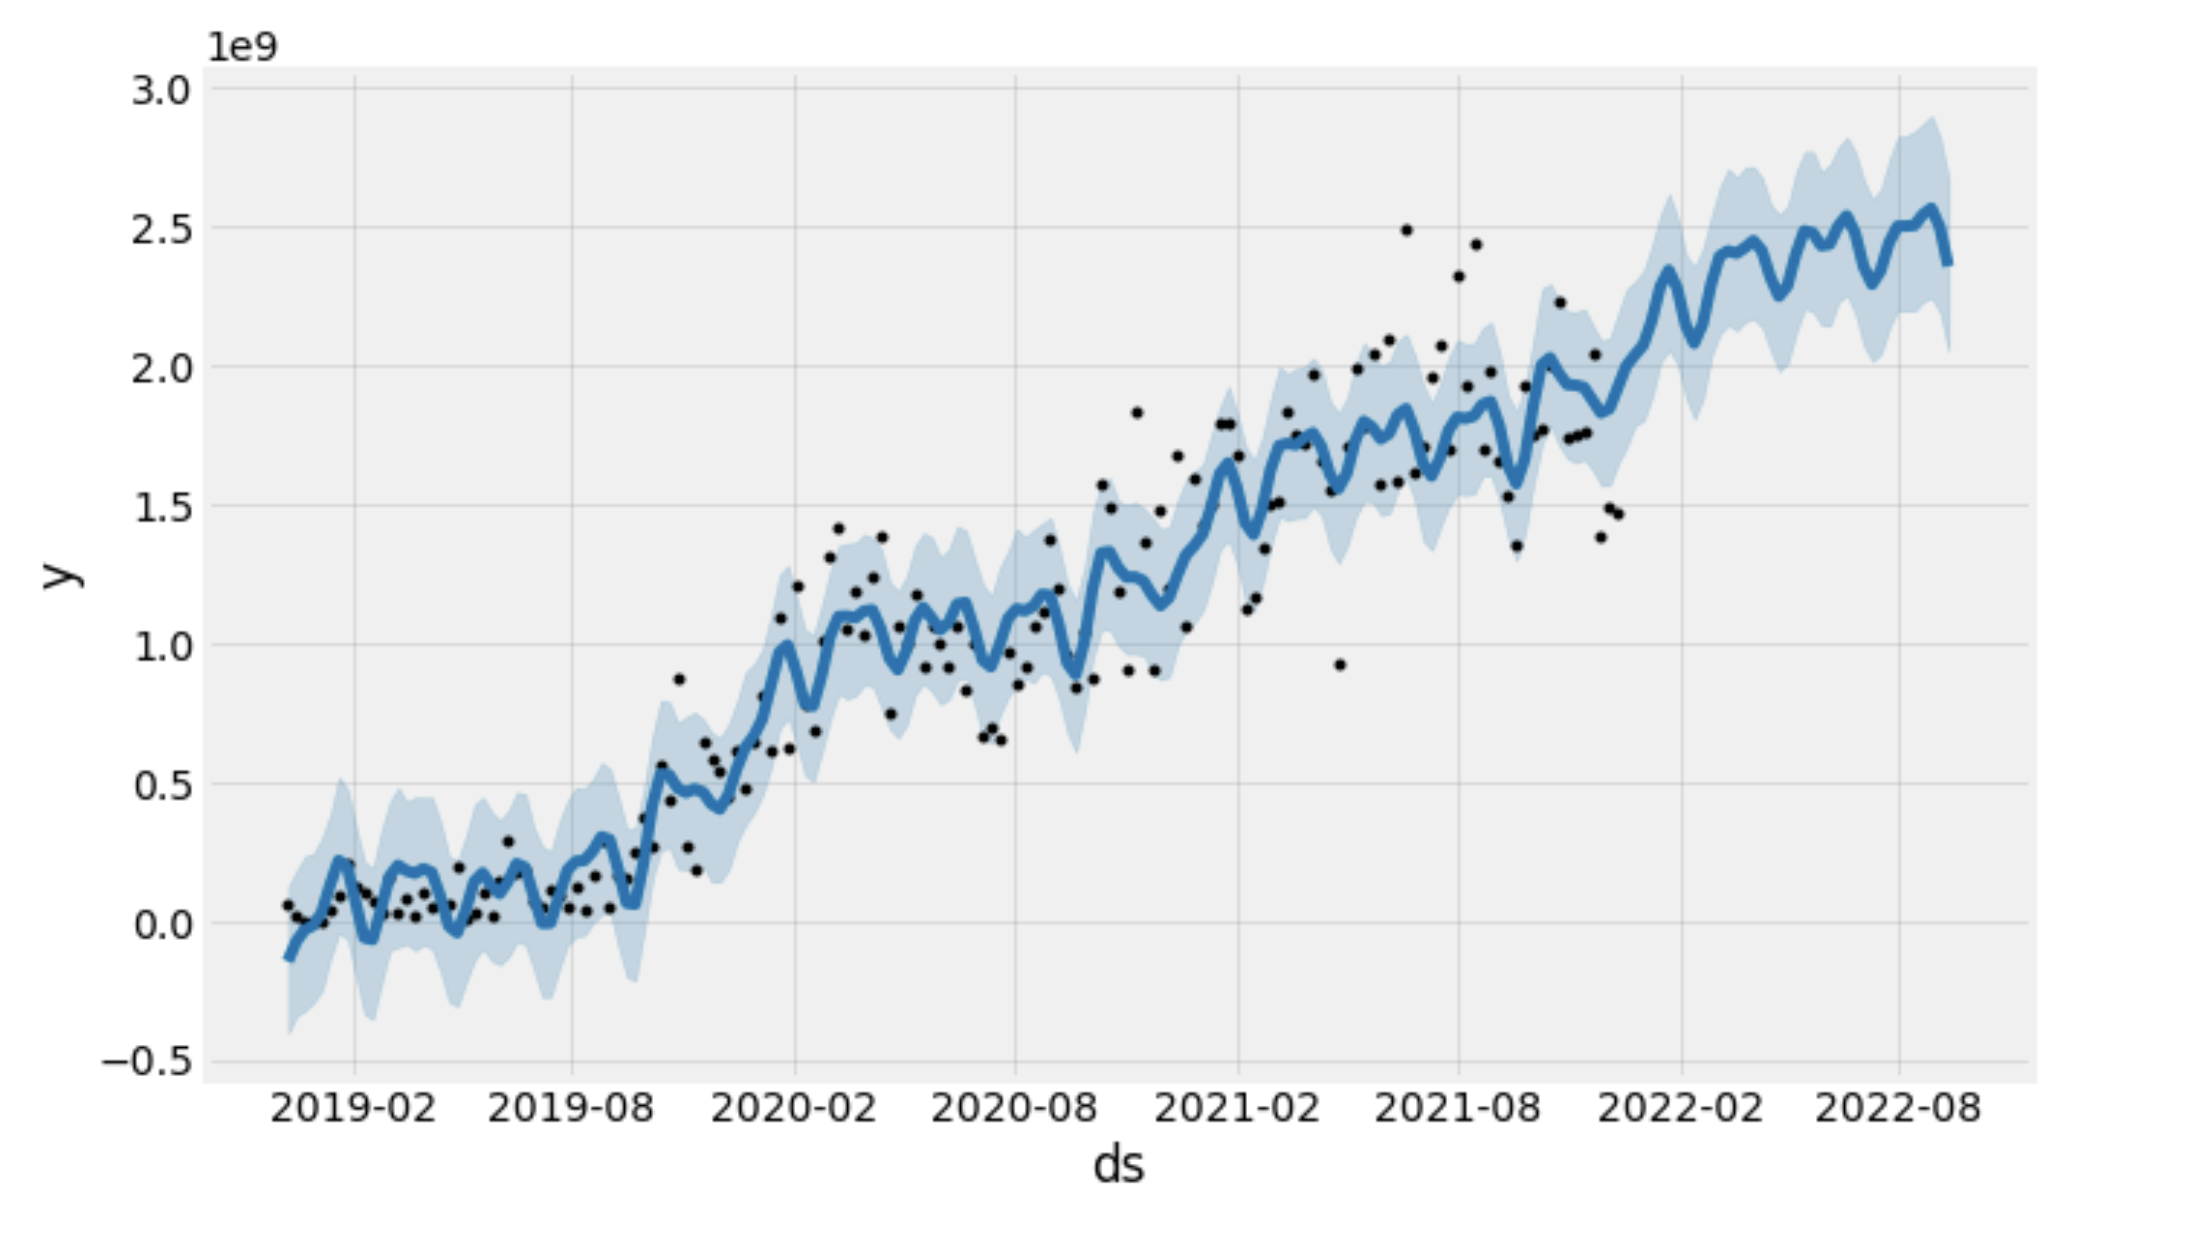

In [91]:
fig = px.bar(summ, x = 'rmse', y = 'model_type',barmode='group', orientation = 'h',
             color_discrete_map={'Validate':'#f3e2fe', "Test":'#6975AB'})
fig.add_vline(x="599773169", line_width=3, line_dash="dash", line_color="#D2DAFF")
fig.update_layout(paper_bgcolor="#202020", plot_bgcolor='#202020', font_color='#f3e2fe', font_size = 16, height = 500)
fig.show()

#### <h3><div class="alert alert-info">NOTES: Facebook Prophet is the best model, with a 56% improvement over baseline model. It predicts TikTok total engagement is going to increase 29% over the next year.</div></h3>

***

# Natural Language Processing

### Q5: Are the most popular/frequent words the same as the words that correspond with higher engagement?

### Prepare
- everything was lower cased
- data underwent unicodedata.normalization using 'NFKD'
- only alphabetic characters were kept

NOTE: lematizing and stemming are typical in natural language processing. However, because social media's abundance of slang and the fact that there were serveral different languages present in the data, stemming and lematizing was not used. 

In [92]:
import re
import unicodedata
import NLP_func_jess

<Figure size 432x288 with 0 Axes>

# Basic Prep

In [93]:
tik = pd.read_csv('tiktok_final_data.csv')

In [94]:
tik.drop(columns = ['Unnamed: 0', 'total_likes', 'total_videos', 'duration'], inplace = True)

In [95]:
tik['engagement'] = (tik.comments+tik.likes+tik.views+tik.shares)/tik.total_followers

In [96]:
tik.drop(columns = ['comments', 'likes', 'views', 'shares', 'hashtag', 'date'], inplace = True)

In [97]:
#separate data based on category, into their own dataframe
tik_fas = tik[tik.category == 'fashion']
tik_fit = tik[tik.category == 'fitness & lifestyle']
tik_foo = tik[tik.category == 'food']
tik_pol = tik[tik.category == 'political']
tik_hum = tik[tik.category == 'humor']

In [98]:
#drop category as a column
tik_fas.drop(columns = ['category'], inplace = True)
tik_fit.drop(columns = ['category'], inplace = True)
tik_foo.drop(columns = ['category'], inplace = True)
tik_pol.drop(columns = ['category'], inplace = True)
tik_hum.drop(columns = ['category'], inplace = True)

In [99]:
def basic_clean(t):
    article = t.lower()
    article1 = unicodedata.normalize('NFKD', article).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    article2 = re.sub(r"[^a-z\s']", '', article1)
    return article2

In [100]:
#set description as a string to prep for basic clean
tik_fas.description = tik_fas.description.astype('str')
tik_fit.description = tik_fit.description.astype('str')
tik_foo.description = tik_foo.description.astype('str')
tik_pol.description = tik_pol.description.astype('str')
tik_hum.description = tik_hum.description.astype('str')

In [101]:
#apply basic clean
tik_fas.description = tik_fas.description.apply(basic_clean)
tik_fit.description = tik_fit.description.apply(basic_clean)
tik_foo.description = tik_foo.description.apply(basic_clean)
tik_pol.description = tik_pol.description.apply(basic_clean)
tik_hum.description = tik_hum.description.apply(basic_clean)

In [102]:
fas_words = ' '.join(tik_fas.description)
fit_words = ' '.join(tik_fit.description)
foo_words = ' '.join(tik_foo.description)
pol_words = ' '.join(tik_pol.description)
hum_words = ' '.join(tik_hum.description)

# Measure words by frequency

(-0.5, 399.5, 199.5, -0.5)

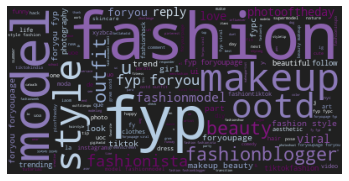

In [103]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate(fas_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('fash_freq.png')

(-0.5, 399.5, 199.5, -0.5)

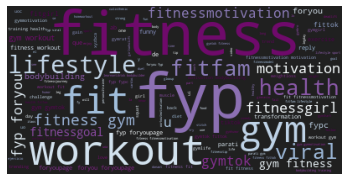

In [104]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate(fit_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('fit_freq.png')

(-0.5, 399.5, 199.5, -0.5)

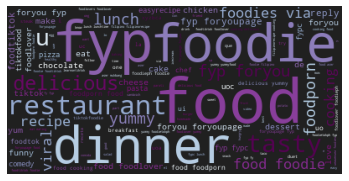

In [105]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate(foo_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('food_freq.png')

(-0.5, 399.5, 199.5, -0.5)

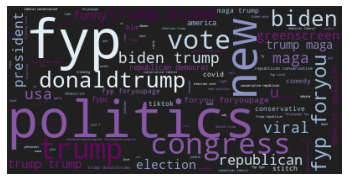

In [106]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate(pol_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('pol_freq.png')

(-0.5, 399.5, 199.5, -0.5)

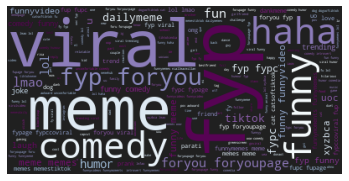

In [107]:
img = WordCloud(background_color='#202020', colormap='BuPu_r').generate(hum_words)
# WordCloud() produces an image object, which can be displayed with plt.imshow
#plt.figure( figsize=(20,10) )
plt.imshow(img)
# axis aren't very useful for a word cloud
plt.axis('off')
#plt.savefig('hum_freq.png')

# Measure words by engagement 
### Due to how long it takes to run the models, images were inserted for your convenience. If you would like to see all the models and code that went into it, please look at NLP_final_jess.ipynb in the explore folder

# Fashion
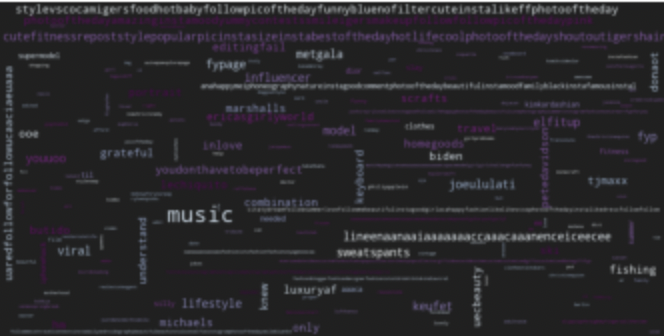

# Lifestyle & Fitness
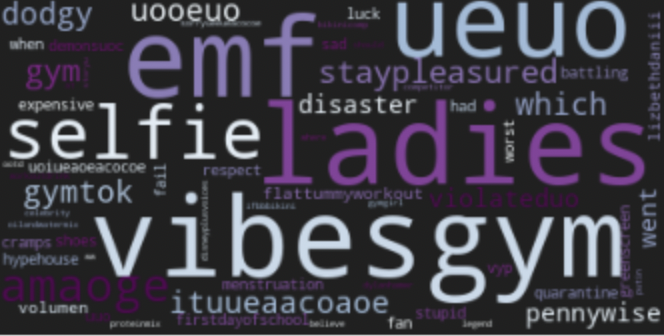

# Food
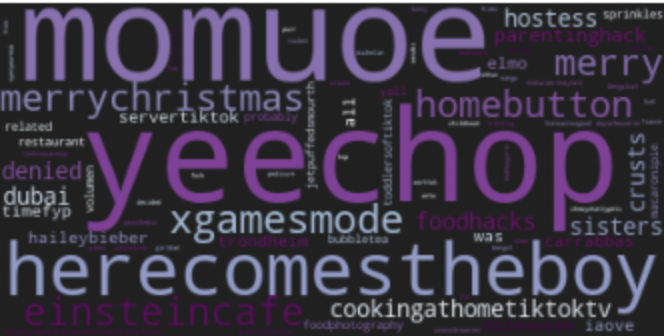

# Humor
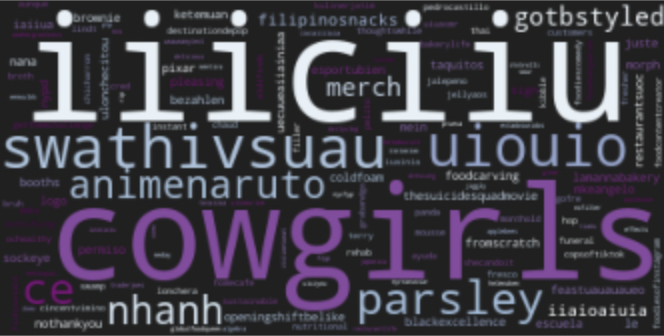

#### <h3><div class="alert alert-info">NOTES: The high frequency word choice is different than the high engagement word choice.</div></h3>

***

<h1 align="center">Conclusion<h1>

▪️ Over **93%** of trending content on TikTok are short(0-15s) & medium(15-60s) videos.

▪️ Video duration and egagement rate is dependent on the cateogory. For example: humor content have the highest performance with extra-long (>3mins) videos, whereas political content perform the best with short (0-15s) videos.

▪️ Trending content of all categories on TikTok have **11M** views, **1.4M** likes, **10.7K** comments, and **34.5K** shares on average.

▪️ Total engagement of 2-year global trending content of each platform: TikTok is **6x** more than YouTube, and more than **1000x** more than Instagram.

▪️ TikTok total engagement has increated **980%** from 2019 to Sep 2022.

▪️ TikTok users respond to **major social/political events** significantly. Engagement peak/rise present prior, during, and after time period of the events.

▪️ Trending content creators' follower size has **decreased** since Jan 2021. TikTok's algorithm has been incentivizing **small creators** to push out content.

▪️ Content-description text frequency **DOES NOT** correlate with engagement. There are specific words that drive engagement for each niche.

▪️ Facebook Prophet model forecast engagement with **56%** improvement compared to baseline.

▪️ Total engagement on TikTok is predicted to increase **29%** within the next year (Oct 2022 - Oct 2023). 

***

<h1 align="center">Future Development<h1>

▪️ Taking a closer look the differences between influencers and common users.

▪️ Including more niches/categories into our scope. For example: pets, sports, dance.

▪️ Doing bi-gram & tri-gram analysis on content description as long as the content of comments on videos.

▪️ Getting users' demographic data and analyzing the relatinship of location, user's age, etc. with engagement.